In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

sns.set_theme(style="whitegrid")

# Load Data

In [57]:
X_train = pd.read_csv("../../data/preprocessed/X_train.csv", index_col=0)
X_test = pd.read_csv("../../data/preprocessed/X_test.csv", index_col=0)
y_train = pd.read_csv("../../data/preprocessed/y_train.csv", index_col=0)

X_train.head(5)

,dataset,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,scoring_F1
0,1169,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1169,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1169,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1169,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1169,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [58]:
X_train["dataset"] = X_train["dataset"].astype("category")
X_train = pd.get_dummies(X_train)
X_train.head(5)

,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,...,dataset_42738,dataset_42750,dataset_43098,dataset_43607,dataset_43890,dataset_43892,dataset_43896,dataset_43897,dataset_43900,dataset_43922
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
N_COMPONENTS = 3

pca = PCA(n_components=N_COMPONENTS)
X_train_transformed = pca.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=[f"PC{i}" for i in range(N_COMPONENTS)])
X_train_transformed.head(5)

,PC0,PC1,PC2
0,-0.657442,0.063599,0.863216
1,-0.657442,0.063599,0.863216
2,-0.657442,0.063599,0.863216
3,-0.657442,0.063599,0.863216
4,-0.657442,0.063599,0.863216


In [60]:
N_CLUSTERS = 6

# Cluster PCA results
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit_transform(X_train_transformed)
X_train_transformed["cluster"] = kmeans.labels_
X_train_transformed.head(5)

,PC0,PC1,PC2,cluster
0,-0.657442,0.063599,0.863216,3
1,-0.657442,0.063599,0.863216,3
2,-0.657442,0.063599,0.863216,3
3,-0.657442,0.063599,0.863216,3
4,-0.657442,0.063599,0.863216,3


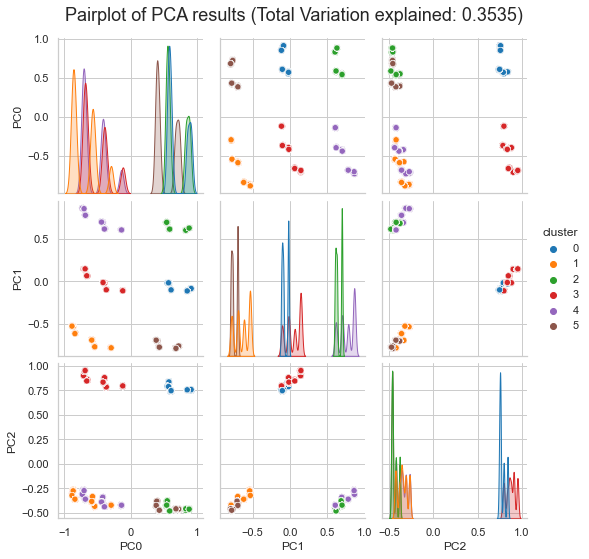

In [71]:
#plt.figure(figsize=(12, 12), dpi=128)
g = sns.pairplot(X_train_transformed, hue="cluster", palette="tab10")
g.fig.suptitle(f"Pairplot of PCA results (Total Variation explained: {sum(pca.explained_variance_ratio_):.4})", y=1.03, fontsize=18)
plt.show()

In [62]:
X_train["cluster"] = kmeans.labels_
X_train["cv_score"] = y_train["cv_score"]
X_train.head(5)

,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,...,dataset_43098,dataset_43607,dataset_43890,dataset_43892,dataset_43896,dataset_43897,dataset_43900,dataset_43922,cluster,cv_score
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,3,0.650562
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,3,0.650712
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,3,0.626492
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,3,0.625839
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,3,0.652093


In [65]:
X_train[["cluster", "cv_score"]].groupby(["cluster"]).describe()

cv_score                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         5809.0  0.814103  0.139996  0.064561  0.735586  0.843478  0.926181   
1         6612.0  0.673507  0.292757  0.000000  0.469668  0.789469  0.912177   
2         6009.0  0.717740  0.182152  0.392005  0.534964  0.714524  0.881000   
3         5829.0  0.820581  0.136131  0.070666  0.740309  0.844145  0.930164   
4         6194.0  0.743701  0.172419  0.362679  0.568904  0.764104  0.884694   
5         5601.0  0.631267  0.330572  0.000000  0.391815  0.773755  0.907259   

              
         max  
cluster       
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
5        1.0